In [56]:
import cv2
import os
import numpy as np

image = []
target_name = []
image_data = []
for root, dirs, files in os.walk("C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset"):
    for img in files:
        target_name.append(os.path.basename(img).split("-")[0])
        path = os.path.join("C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset", img)
        img = image.append(path)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150, 150))
        image_data.append(img)
        

In [57]:
image_data[:5]

[array([[[145, 151, 141],
         [133, 141, 132],
         [123, 128, 127],
         ...,
         [ 28,  34,  29],
         [ 35,  43,  35],
         [ 27,  35,  27]],
 
        [[151, 155, 144],
         [139, 143, 137],
         [127, 130, 128],
         ...,
         [ 33,  40,  38],
         [ 33,  40,  35],
         [ 32,  37,  35]],
 
        [[155, 156, 146],
         [146, 146, 139],
         [134, 135, 131],
         ...,
         [ 33,  38,  37],
         [ 34,  39,  40],
         [ 37,  44,  42]],
 
        ...,
 
        [[250, 255, 255],
         [250, 255, 255],
         [250, 255, 255],
         ...,
         [114,  79, 196],
         [119,  84, 201],
         [125,  90, 206]],
 
        [[250, 255, 255],
         [250, 255, 255],
         [250, 255, 255],
         ...,
         [120,  82, 201],
         [117,  80, 196],
         [121,  84, 200]],
 
        [[250, 255, 255],
         [250, 255, 255],
         [250, 255, 255],
         ...,
         [127,  89, 208],
  

In [58]:
image

['C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-1.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-10.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-100.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-101.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-102.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-103.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-104.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-105.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-106.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-107.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-108.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female-109.jpg',
 'C:\\Users\\OLASEBIKAN\\Data Captured\\Female_Male_Dataset\\Female

In [59]:
image_array = np.array(image_data, dtype='float32')
image_array.shape

(500, 150, 150, 3)

In [67]:
image_array = image_array.reshape(500, -1)

In [68]:
print(len(image_array))
image_array.shape

500


(500, 67500)

In [62]:
target_name = np.array(target_name)
print(len(target_name))
target_name

500


array(['Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Fema

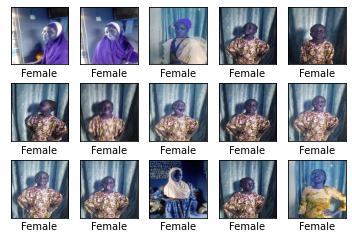

In [69]:
# Let’s plot a few of these faces to see what we’re working with:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(image_data[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=target_name[i])

In [70]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(image_array, target_name, test_size=0.2, random_state=0)

In [71]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = RandomizedPCA(n_components=150, svd_solver='randomized', whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [72]:
model.fit(Xtrain, ytrain)

Pipeline(steps=[('pca',
                 PCA(n_components=150, svd_solver='randomized', whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

In [73]:
ypred = model.predict(Xtest)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, target_names=["Female", "Male"]))

              precision    recall  f1-score   support

      Female       0.93      0.90      0.92        61
        Male       0.85      0.90      0.88        39

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



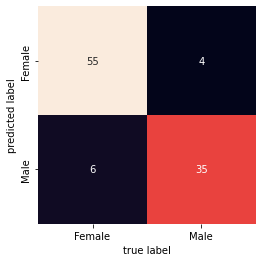

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["Female", "Male"], 
            yticklabels=["Female", "Male"])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [78]:
new_data = Xtest[0].reshape(1, 67500)
print(len(ytest))
print(ytest[0])

100
Female


In [79]:
def predict(new_data):
    ypred = model.predict(new_data)
    return ypred[0]

predict(new_data)

'Female'